In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name: Aditya Saraf
Roll Number: 210067
IITK Email: saditya21@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha,epochs)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'
    2. Report the MSE value for your model after training
    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

"""

"\nMatSoc: Intro to ML Techniques\nAssignment 1\nDeadline: Wednesday, 27 December 2023, 23:59 IST\n\nName: Aditya Saraf\nRoll Number: 210067\nIITK Email: saditya21@iitk.ac.in\n\nPart A:\n\nI.\n\n1. Plot x vs y scatter plot for the given dataset\n2. Plot the histogram of the y values\n3. Clean the data by removing outliers and nan value containing datapoints\n4. Plot a histogram for y values before and after cleaning the data.\n5. Split the data into train and test with 85% of the data used for training\n\nII.\n\n1. Implement the following function:\n\n  def gradient_descent(x,y,alpha,epochs)\n\n  The function should return two parameter values (a,b)\n  corresponding to the model  ŷ=a*x+b\n\n2. Plot the histogram with the residuals (y- ŷ) after model training for the\n   original and predicted values\n\n3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot\n\n  Note that the code for all of part A must be visible\n\n  Preferrably use pandas for data cleaning and 

In [ ]:
!pip install gdown

In [ ]:
import gdown

file_url = 'https://drive.google.com/uc?id=1Rb6ODiBDdhiHZ_PUa7ApRfhO2syR2-YR'

output_file = 'data.csv'

# Download the file from Google Drive
gdown.download(file_url, output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Rb6ODiBDdhiHZ_PUa7ApRfhO2syR2-YR
To: /content/data.csv
100%|██████████| 16.7k/16.7k [00:00<00:00, 8.86MB/s]


'data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the downloaded CSV file
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,x,y
0,0,2,43.00
1,1,3,55.48
2,2,4,68.08
3,3,5,79.24
4,4,5,79.24


1. Plot x vs y scatter plot for the given dataset

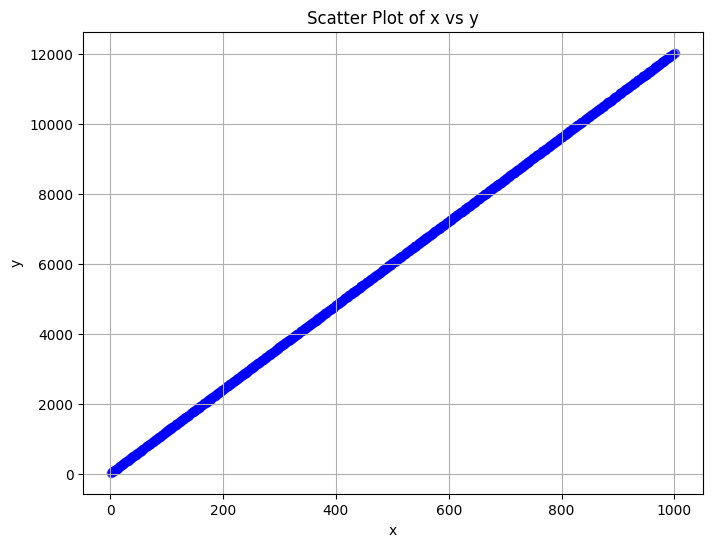

In [ ]:
# Assuming x and y are columns in your dataset
x = data['x']
y = data['y']

# Plotting x vs y scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

2. Plot the histogram of the y values

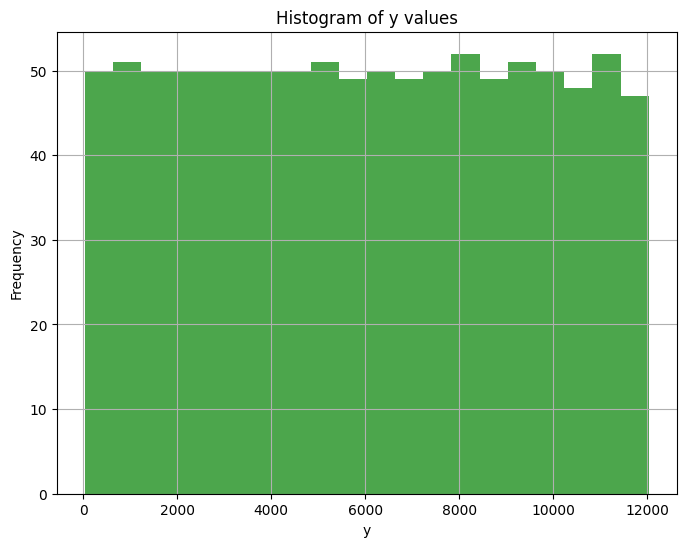

In [ ]:
# Plotting histogram of y values
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='green', alpha=0.7)
plt.title('Histogram of y values')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3. Clean the data by removing outliers and nan value containing datapoints

In [ ]:
# Removing outliers and NaN values from the dataset
cleaned_data = data.dropna()  # Remove rows with NaN values
cleaned_data = cleaned_data[(np.abs(cleaned_data['y'] - cleaned_data['y'].mean()) / cleaned_data['y'].std()) < 3]  # Remove outliers

# Display the first few rows of cleaned data
cleaned_data.head()

,Unnamed: 0,x,y
0,0,2,43.00
1,1,3,55.48
2,2,4,68.08
3,3,5,79.24
4,4,5,79.24


**4. Plot a histogram for y values before and after cleaning the data.**

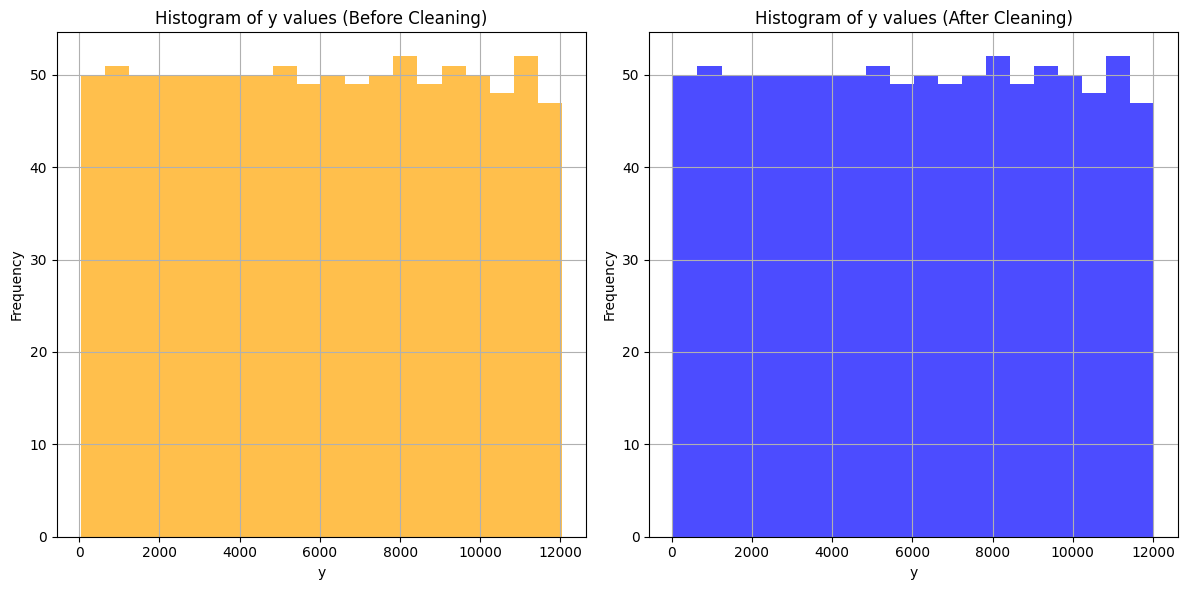

In [ ]:
# Plotting histogram of y values before and after cleaning
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of y values (Before Cleaning)')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(cleaned_data['y'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of y values (After Cleaning)')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

**5. Split the data into train and test with 85% of the data used for training**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are columns in your cleaned dataset
x_cleaned = cleaned_data['x']
y_cleaned = cleaned_data['y']

# Splitting the cleaned data into train and test sets (85% train, 15% test)
x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.15, random_state=42)

# Display the shapes of train and test sets
print(f"Shape of x_train: {x_train.shape}, Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of x_train: (849,), Shape of x_test: (150,)
Shape of y_train: (849,), Shape of y_test: (150,)


**1. Implement the following function:**

  def gradient_descent(x,y,alpha,epochs)

  The function should return two parameter values (a,b) corresponding to the model ŷ=a*x+b.

In [ ]:
x = data['x']
y = data['y']

def gradient_descent(x, y, alpha, epochs):
    # Initialize parameters a and b
    a = 0
    b = 0

    # Number of samples
    n = float(len(x))

    # Gradient Descent
    for _ in range(epochs):
        # predicted values
        y_pred = a * x + b

        # derivatives for a and b
        derivative_a = (-2/n) * np.sum(x * (y - y_pred))
        derivative_b = (-2/n) * np.sum(y - y_pred)

        # Update parameters a and b
        a -= alpha * derivative_a
        b -= alpha * derivative_b

    return a, b

# parameters for gradient descent
alpha = 0.0000001  # Learning rate
epochs = 1000  # Number of iterations

# Obtain parameters 'a' and 'b' using gradient descent
a, b = gradient_descent(x, y, alpha, epochs)
print(f"Parameters obtained: a = {a}, b = {b}")

Parameters obtained: a = 12.028517307752422, b = 0.0190034650848239


**2. Plot the histogram with the residuals (y- ŷ) after model training for the original and predicted values.**

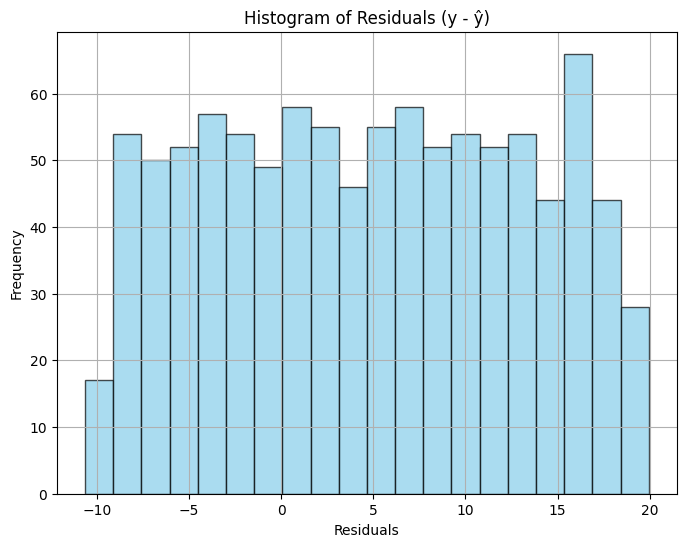

In [ ]:
import matplotlib.pyplot as plt

# predicted values using obtained parameters 'a' and 'b'
y_pred = a * x + b

# residuals (y - ŷ)
residuals = y - y_pred

# Plot histogram with residuals for original and predicted values
plt.figure(figsize=(8, 6))

plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals (y - ŷ)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot**

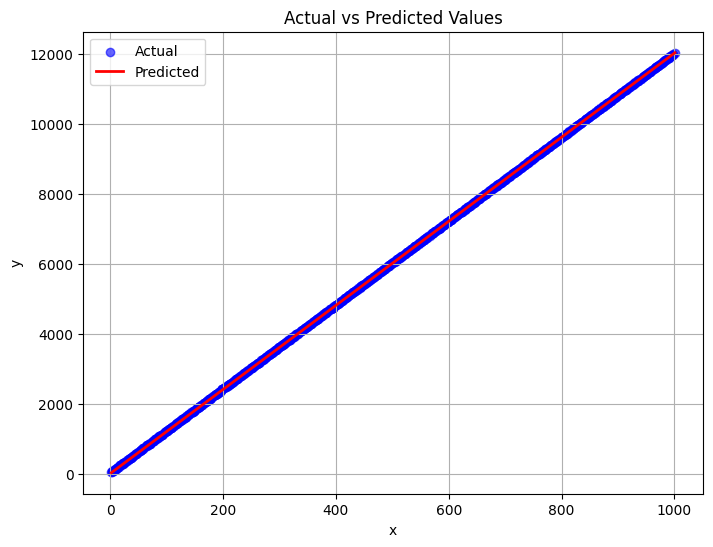

In [ ]:
import matplotlib.pyplot as plt

# Calculate predicted values using obtained parameters 'a' and 'b'
y_pred = a * x + b

# Plot ŷ vs x (line chart) overlaid on y vs x (scatter plot)
plt.figure(figsize=(8, 6))

# Scatter plot of y vs x
plt.scatter(x, y, label='Actual', color='blue', alpha=0.6)

# Line chart of ŷ vs x
plt.plot(x, y_pred, label='Predicted', color='red', linewidth=2)

plt.title('Actual vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**1. Report the parameter values after training on the given data the target variable is 'y' and there is only one feature 'x'.**

In [ ]:
print(f"Parameter 'a': {a}")
print(f"Parameter 'b': {b}")

Parameter 'a': 12.028517307752422
Parameter 'b': 0.0190034650848239


**2. Report the MSE value for your model after training**

In [ ]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 90.86678646725578


**3. What do you think is the ideal ratio for train data if we are splitting the data into train and test datasets? Is the answer same irrespective of the size of the dataset? What percent would you take for training if your dataset has 1 feature, 1 target and 250 data points, what would you do if it had 10,000 data points instead of 250 data points.**

**Answer.)** The ideal ratio for splitting data into training and test dataset
             can vary based on several factors, including the size of the dataset, the complexity of the problem, the amount of available data. Their are some examples of splitings like 70-30 or 80-20 splitting.
             250 data points: With a relatively smaller dataset like this, a split of 70-30 or 80-20 could be reasonable.
             10,000 data points: With a larger dataset, you might consider having a smaller percentage for testing while retaining enough data for training. E.g., 80-20 split could lead to 8,000 data points for training and 2,000 data points for testing.
             
